In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
diab=pd.read_csv("diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
diab.isnull().values.any()

False

In [4]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
(diab.Pregnancies == 0).sum(),(diab.Glucose==0).sum(),(diab.BloodPressure==0).sum(),(diab.SkinThickness==0).sum(),(diab.Insulin==0).sum(),(diab.BMI==0).sum(),(diab.DiabetesPedigreeFunction==0).sum(),(diab.Age==0).sum()

(301, 13, 90, 573, 956, 28, 0, 0)

In [6]:
drop_Glu=diab.index[diab.Glucose == 0].tolist()
drop_BP=diab.index[diab.BloodPressure == 0].tolist()
drop_Skin = diab.index[diab.SkinThickness==0].tolist()
drop_Ins = diab.index[diab.Insulin==0].tolist()
drop_BMI = diab.index[diab.BMI==0].tolist()
c=drop_Glu+drop_BP+drop_Skin+drop_Ins+drop_BMI
dia=diab.drop(diab.index[c])

In [7]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 1 to 1999
Data columns (total 9 columns):
Pregnancies                 1035 non-null int64
Glucose                     1035 non-null int64
BloodPressure               1035 non-null int64
SkinThickness               1035 non-null int64
Insulin                     1035 non-null int64
BMI                         1035 non-null float64
DiabetesPedigreeFunction    1035 non-null float64
Age                         1035 non-null int64
Outcome                     1035 non-null int64
dtypes: float64(2), int64(7)
memory usage: 80.9 KB


In [8]:
dia1 = dia[dia.Outcome==1]
dia0 = dia[dia.Outcome==0]

In [26]:
dia1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,0,135,68,42,250,42.3,0.365,24,1
11,4,125,70,18,122,28.9,1.144,45,1
16,7,195,70,33,145,25.1,0.163,55,1
24,0,180,90,26,90,36.5,0.314,35,1
33,3,163,70,18,105,31.6,0.268,28,1
...,...,...,...,...,...,...,...,...,...
1980,17,163,72,41,114,40.9,0.817,47,1
1986,6,104,74,18,156,29.9,0.722,41,1
1992,6,134,70,23,130,35.4,0.542,29,1
1996,8,179,72,42,130,32.7,0.719,36,1


In [27]:
dia0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84,82,31,125,38.2,0.233,23,0
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
8,2,83,65,28,66,36.8,0.629,24,0
15,2,81,72,15,76,30.1,0.547,25,0
...,...,...,...,...,...,...,...,...,...
1983,0,114,80,34,285,44.2,0.167,27,0
1990,3,111,90,12,78,28.4,0.495,29,0
1994,1,79,60,42,48,43.5,0.678,23,0
1995,2,75,64,24,55,29.7,0.370,33,0


Text(0.5, 1.0, 'Boxplot for Age')

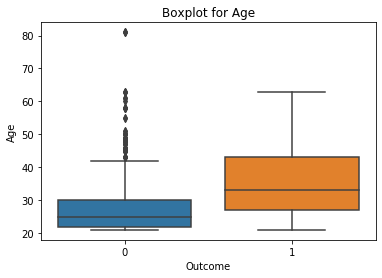

In [20]:
sns.boxplot(x=dia.Outcome,y=dia.Age)
plt.title("Boxplot for Age")

Text(0.5, 1.0, 'Boxplot for Pregnancies')

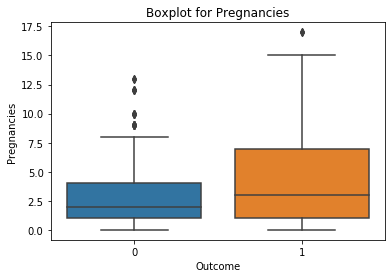

In [22]:
sns.boxplot(x=dia.Outcome,y=dia.Pregnancies)
plt.title("Boxplot for Pregnancies")

Text(0.5, 1.0, 'Boxplot for BMI')

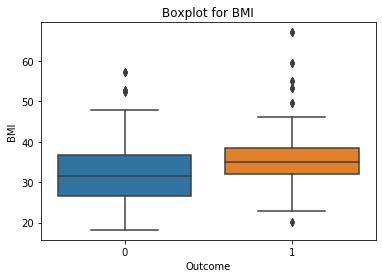

In [25]:
sns.boxplot(x=dia.Outcome,y=dia.BMI)
plt.title("Boxplot for BMI")